<a href="https://colab.research.google.com/github/anhnguyenvv/PP_final/blob/main/Project_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import datetime
import tensorflow as tf

print(tf.__version__)

2.17.1


In [2]:
mnist = tf.keras.datasets.fashion_mnist
(train_img, train_label), (test_img, test_label) = mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
# Kiểm tra kích thước của dữ liệu
print("Train images shape:", train_img.shape)  # (60000, 28, 28)
print("Train labels shape:", train_label.shape)  # (60000,)

Train images shape: (60000, 28, 28)
Train labels shape: (60000,)


In [4]:
print(np.where(train_img[0] >0, 1, 0))
print(train_label[0:10])

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 0 1 1 1 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 0 0 0 0 1 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [0 0 0 0 0 0 0 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0]
 [0 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0]
 [0 0 1 1 1 1 1 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0]
 [0 1 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0]
 [0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 

In [5]:

# Làm phẳng dữ liệu từ (28, 28) thành (784,)
train_img = np.array(train_img.reshape(-1, 28 * 28)/255.0, dtype=np.float32)
test_img = np.array(test_img.reshape(-1, 28 * 28)/255.0, dtype=np.float32)

# Kiểm tra kích thước sau khi làm phẳng
print("Flattened train images shape:", train_img.shape)  # (60000, 784)
print("Flattened test images shape:", test_img.shape)    # (10000, 784)


Flattened train images shape: (60000, 784)
Flattened test images shape: (10000, 784)


In [6]:
'''from tensorflow.keras.utils import to_categorical
train_label = to_categorical(train_label, num_classes=10).astype(np.float32)
test_label = to_categorical(test_label, num_classes=10).astype(np.float32)
# Kiểm tra kích thước sau khi one-hot encoding
print("One-hot encoded train labels shape:", train_label.shape)  # (60000, 10)
print("One-hot encoded test labels shape:", test_label.shape)    # (10000, 10)
'''
train_label = np.array(train_label, dtype=np.int32)
test_label = np.array(test_label, dtype=np.int32)


In [7]:
# Lưu tập dữ liệu huấn luyện và nhãn thành tệp nhị phân

train_img.tofile("x_train.bin")
train_label.tofile( "y_train.bin")

# Lưu tập dữ liệu kiểm tra và nhãn thành tệp nhị phân
test_img.tofile("x_test.bin")
test_label.tofile("y_test.bin")

print("Data saved successfully!")

Data saved successfully!


In [16]:
import gdown

# ID của tệp Google Drive
file_ids = [
    "1QM7e-rngKLvQWHBB2Tx6Ib9q1mf9aS6z",
    "19gx53eEphbOCCHI8-37wPNcNSrTVTP0l"
]

# Đường dẫn lưu trữ tệp tải về
output_files = ["network_host.cu", "network_gpu.cu"]  # Đổi tên file theo ý muốn

# Tải xuống từng tệp
for file_id, output in zip(file_ids, output_files):
    gdown.download(f"https://drive.google.com/uc?id={file_id}", output, quiet=False)

print("Tải xuống hoàn tất!")

Downloading...
From: https://drive.google.com/uc?id=1QM7e-rngKLvQWHBB2Tx6Ib9q1mf9aS6z
To: /content/network_host.cu
100%|██████████| 15.7k/15.7k [00:00<00:00, 26.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=19gx53eEphbOCCHI8-37wPNcNSrTVTP0l
To: /content/network_gpu.cu
100%|██████████| 16.3k/16.3k [00:00<00:00, 26.5MB/s]

Tải xuống hoàn tất!


In [62]:
!nvcc  network_host.cu -o host

In [63]:
!./host

Epoch 1/10 completed, Loss: 6.6636, Accuracy: 42.60%
    Layer 1 time: 13.298974 seconds
    Layer 2 time: 2.057436 seconds
    Output layer time: 0.150705 seconds
Epoch 2/10 completed, Loss: 3.1998, Accuracy: 70.81%
    Layer 1 time: 14.096828 seconds
    Layer 2 time: 2.179136 seconds
    Output layer time: 0.160763 seconds
Epoch 3/10 completed, Loss: 2.5338, Accuracy: 77.74%
    Layer 1 time: 13.202720 seconds
    Layer 2 time: 2.050132 seconds
    Output layer time: 0.150409 seconds
Epoch 4/10 completed, Loss: 2.4620, Accuracy: 79.19%
    Layer 1 time: 13.287684 seconds
    Layer 2 time: 2.061629 seconds
    Output layer time: 0.151383 seconds
Epoch 5/10 completed, Loss: 2.6761, Accuracy: 79.81%
    Layer 1 time: 14.107110 seconds
    Layer 2 time: 2.175911 seconds
    Output layer time: 0.160535 seconds
Epoch 6/10 completed, Loss: 2.7005, Accuracy: 80.17%
    Layer 1 time: 13.225170 seconds
    Layer 2 time: 2.057537 seconds
    Output layer time: 0.151182 seconds
Epoch 7/10 compl

In [64]:
!nvcc  network_gpu.cu -o gpu

In [65]:
!./gpu

Epoch 1/10 completed, Loss: 6.8752, Accuracy: 40.74%
    Layer 1 time: 13.243153 seconds
    Layer 2 time: 2.044710 seconds
    Output layer time: 0.149217 seconds
Epoch 2/10 completed, Loss: 3.2806, Accuracy: 70.81%
    Layer 1 time: 13.529489 seconds
    Layer 2 time: 2.088448 seconds
    Output layer time: 0.153124 seconds
Epoch 3/10 completed, Loss: 2.5543, Accuracy: 77.13%
    Layer 1 time: 13.825673 seconds
    Layer 2 time: 2.127921 seconds
    Output layer time: 0.156606 seconds
Epoch 4/10 completed, Loss: 2.2938, Accuracy: 80.08%
    Layer 1 time: 13.220439 seconds
    Layer 2 time: 2.035174 seconds
    Output layer time: 0.149464 seconds
Epoch 5/10 completed, Loss: 1.9602, Accuracy: 82.31%
    Layer 1 time: 13.698728 seconds
    Layer 2 time: 2.107469 seconds
    Output layer time: 0.155804 seconds
Epoch 6/10 completed, Loss: 1.8130, Accuracy: 83.21%
    Layer 1 time: 13.554453 seconds
    Layer 2 time: 2.082707 seconds
    Output layer time: 0.152850 seconds
Epoch 7/10 compl

In [31]:
!nvcc  a.cu -o a

In [32]:
!./a

Kết quả từ phương pháp 1:
269.000000 239.000000 0.000000 0.000000 349.000000 
0.000000 244.000000 390.000000 322.000000 0.000000 
0.000000 226.000000 407.000000 0.000000 357.000000 

Kết quả từ phương pháp 2:
269.000000 239.000000 0.000000 0.000000 349.000000 
0.000000 244.000000 390.000000 322.000000 0.000000 
0.000000 226.000000 407.000000 0.000000 357.000000 


In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
#Tạo mô hình ANN
model = tf.keras.models.Sequential()

In [12]:
from tensorflow.keras.utils import to_categorical
train_label = to_categorical(train_label, num_classes=10).astype(np.float32)
test_label = to_categorical(test_label, num_classes=10).astype(np.float32)
# Kiểm tra kích thước sau khi one-hot encoding
print("One-hot encoded train labels shape:", train_label.shape)  # (60000, 10)
print("One-hot encoded test labels shape:", test_label.shape)    # (10000, 10)


One-hot encoded train labels shape: (60000, 10)
One-hot encoded test labels shape: (10000, 10)


In [13]:
# Hiển thị tóm tắt mô hình
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [14]:
# Tạo mô hình ANN
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(784,)),                # Lớp đầu vào (Flatten đã được thực hiện)
    tf.keras.layers.Dense(128, activation='relu'),      # Lớp ẩn thứ nhất
    tf.keras.layers.Dense(128, activation='relu'),       # Lớp ẩn thứ hai
    tf.keras.layers.Dense(10, activation='softmax')     # Lớp đầu ra
])

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.7827 - loss: 0.6150 - val_accuracy: 0.8499 - val_loss: 0.4172
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8628 - loss: 0.3724 - val_accuracy: 0.8631 - val_loss: 0.3776
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8781 - loss: 0.3308 - val_accuracy: 0.8675 - val_loss: 0.3694
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8871 - loss: 0.3064 - val_accuracy: 0.8659 - val_loss: 0.3589
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8932 - loss: 0.2859 - val_accuracy: 0.8759 - val_loss: 0.3451
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8959 - loss: 0.2734 - val_accuracy: 0.8780 - val_loss: 0.3485
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9014 - loss: 0.2586 - val_accuracy: 0.8775 - val_loss: 0.3431
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9050 - loss: 0.2509

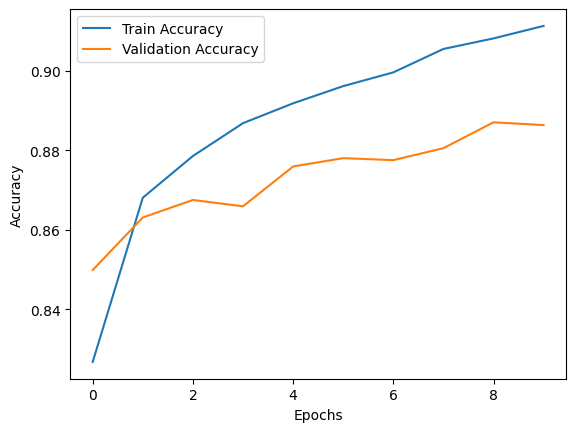

In [15]:
# Compile mô hình
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Huấn luyện mô hình
history = model.fit(train_img, train_label, validation_data=(test_img, test_label), epochs=10, batch_size=32)

# Đánh giá mô hình
test_loss, test_accuracy = model.evaluate(test_img, test_label)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

# Vẽ đồ thị quá trình huấn luyện
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()